# Automatic Recognition of Persuasive Content on Electronic News

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb

# Install Lib

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import nltk
import tensorflow as tf
import numpy as np

from nltk.corpus import stopwords
from keras.preprocessing import sequence
nltk.download("popular")

!pip install Sastrawi
!pip install nlp-id
!pip install transformers
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.
!pip install transformers==4.31.0
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

  Using cached networkx-2.6-py3-none-any.whl.metadata (4.9 kB)
Using cached networkx-2.6-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


Reason for being yanked: Need to resolve: https://github.com/networkx/networkx/pull/4967


  Using cached transformers-4.31.0-py3-none-any.whl.metadata (116 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [62 lines of output]
  C:\Users\Asiyah\AppData\Local\Temp\pip-build-env-6g8t_mr8\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: Apache Software License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
  creating build\lib.win-amd64-cpyt

# Init Data

In [3]:
from io import BytesIO

import requests
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Prepocessed (3)', dtype=str, index_col=None)

C:\Users\Asiyah\AppData\Local\Temp\ipykernel_20756\3390696530.py:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataset = pd.read_excel(data, 'Prepocessed (3)', dtype=str, index_col=None)


In [4]:
len(dataset)

2502

In [5]:
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [6]:
import re

def changeQuotation(text):
  text = re.sub(r'"',r'“', text)
  return text

In [7]:
dataset['content per paragraf'] = dataset['content per paragraf'].apply(changeQuotation)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def feature_engineering(content):
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
  dt_matrix = tv.fit_transform(content)
  dt_matrix = dt_matrix.toarray()

  vocab = tv.get_feature_names_out()
  td_matrix = dt_matrix.T
  return td_matrix,dt_matrix

## Split dataset

In [9]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [10]:
# x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold

# kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
   #print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   x_train, x_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

(2002, 2)


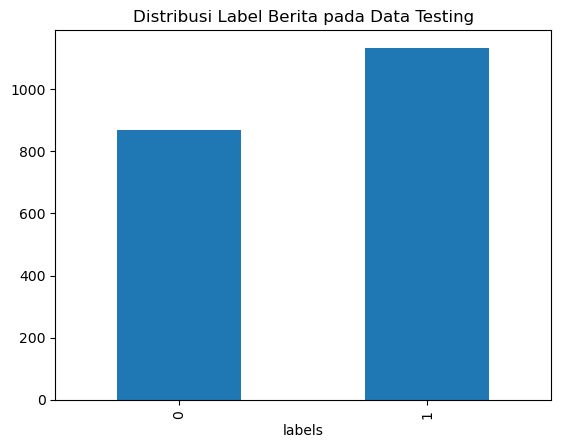

In [11]:
import matplotlib.pyplot as plt

df_train = pd.DataFrame(list(zip(x_train, y_train)), columns=['content_lemma', 'labels'])
df_train.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_train.shape)

(500, 2)


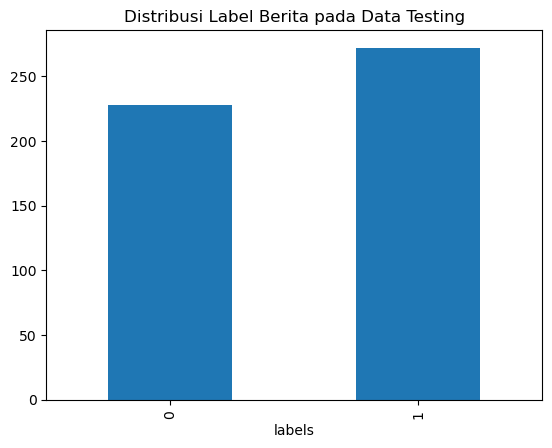

In [12]:
df_test = pd.DataFrame(list(zip(x_test, y_test)), columns=['content_lemma', 'labels'])
df_test.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_test.shape)

# Word Embedding (BERT)

In [13]:
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer, BertModel
from transformers import TFBertModel

# Inisialisasi tokenizer dan model IndoBERT
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
indobert = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

# Tokenisasi data input (X_train dan X_test)
inputs_train = tokenizer(list(x_train), padding=True, truncation=True, return_tensors="tf")
inputs_test = tokenizer(list(x_test), padding=True, truncation=True, return_tensors="tf")

# Mendapatkan output dari model IndoBERT
train_output = indobert(inputs_train)[0]  # (batch_size, sequence_length, hidden_size)
test_output = indobert(inputs_test)[0]   # (batch_size, sequence_length, hidden_size)

# Mengambil representasi dari token [CLS] sebagai representasi untuk seluruh teks
X_train_features = train_output[:, 0, :].numpy()  # Ambil vektor dari token pertama [CLS]
X_test_features = test_output[:, 0, :].numpy()    # Ambil vektor dari token pertama [CLS]

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Langkah 1: Menggunakan GridSearchCV untuk Menentukan n_estimators
# Menyiapkan model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Menentukan parameter yang ingin diuji
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],  # Daftar nilai n_estimators yang ingin diuji
    'max_depth': [None, 10, 20, 30],  # Menambahkan parameter lain yang bisa dicoba
    'min_samples_split': [2, 5, 10]
}

# Melakukan Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih GridSearchCV dengan data pelatihan
grid_search.fit(X_train_features, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}
Best cross-validation score: 0.8860


In [15]:
# Langkah 2: Menilai Hasil
# Gunakan parameter terbaik untuk melatih model akhir
best_rf_model = grid_search.best_estimator_

# Prediksi dengan data uji
y_pred_rf = best_rf_model.predict(X_test_features)

# Evaluasi model
print(f"Akurasi model dengan parameter terbaik: {accuracy_score(y_test, y_pred_rf):.4f}")


Akurasi model dengan parameter terbaik: 0.9160


In [17]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk mengonversi label ke format numerik
encoder = LabelEncoder()

# Konversi y_test dan y_pred_svm ke numerik
y_test_numeric = encoder.fit_transform(y_test)
y_pred_rf_numeric = encoder.transform(y_pred_rf)

# Cek hasil konversi
print(f"Contoh y_test: {y_test[:10]}")
print(f"Contoh y_test_numeric: {y_test_numeric[:10]}")


Contoh y_test: ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
Contoh y_test_numeric: [1 1 1 1 1 1 1 1 1 1]


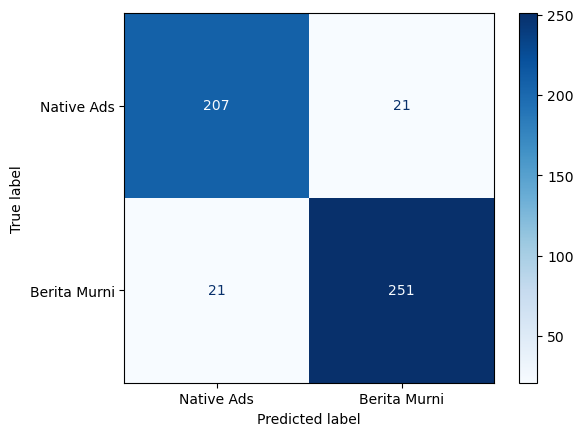

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Native Ads", "Berita Murni"]

cm = confusion_matrix(y_test_numeric, y_pred_rf_numeric)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test_numeric, y_pred_rf_numeric,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_test_numeric, y_pred_rf_numeric))

Precision :  0.9153444272445821
Recall    :  0.9153444272445821
F-score   :  0.9153444272445821
Accuracy :  0.916


## ROC

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


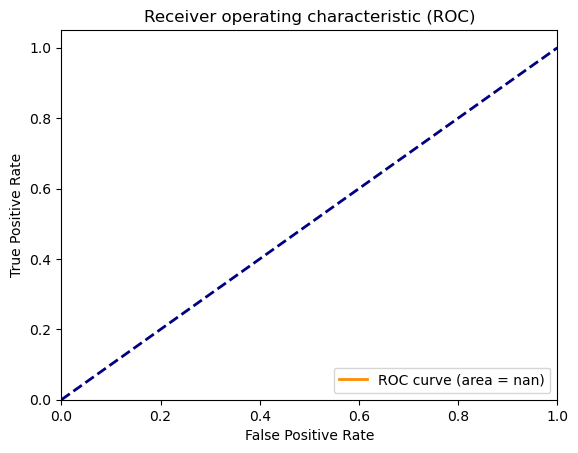

In [20]:
from sklearn import metrics

y = np.array(y_test)

scores = np.array(y_pred_rf)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_rf_numeric, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_pred_rf_numeric)
auc_rf = auc(fpr_rf, tpr_rf)

In [22]:
auc_rf

0.9153444272445821

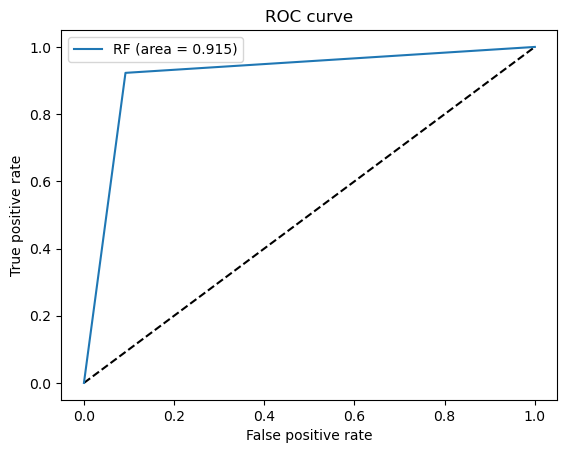

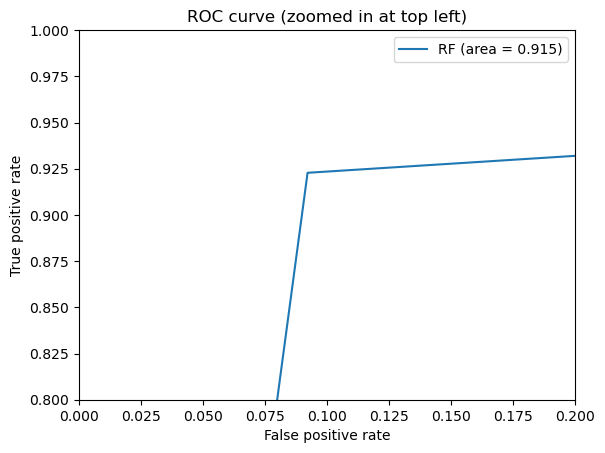

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [24]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_test_numeric, y_pred_rf_numeric)

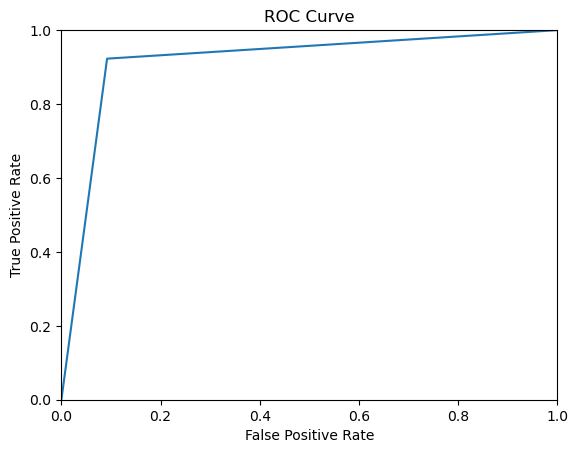

In [26]:
plot_roc_curve (fpr,tpr)

In [27]:
roc_auc_score(y_test_numeric, y_pred_rf_numeric)

0.9153444272445821

0.9153444272445821


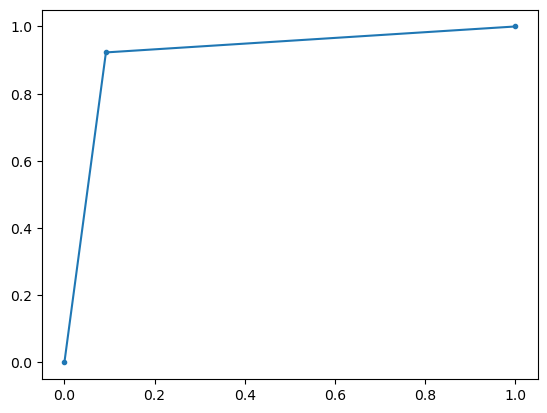

In [28]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_numeric, y_pred_rf_numeric)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [29]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [30]:
perf_measure(y_test_numeric, y_pred_rf_numeric)

(251, 21, 207, 21)

# Menampilkan data yang salah di deteksi

In [31]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_indices = []
    TN_indices = []
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
            TP_indices.append(i)
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
            TN_indices.append(i)
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices

In [32]:
perf_measure(y_test_numeric, y_pred_rf_numeric)

(251,
 21,
 207,
 21,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  1

In [33]:
# Calculate the performance metrics and retrieve indices
TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices = perf_measure(y_test_numeric, y_pred_rf_numeric)

# Select the FP and FN data from the dataset
FP_data = dataset.iloc[FP_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]
FN_data = dataset.iloc[FN_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]

In [34]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
    id-berita                                                url  \
317       272  https://tekno.sindonews.com/read/653809/776/in...   
350       275  https://tekno.sindonews.com/read/635979/776/yu...   
372       278  https://tekno.sindonews.com/read/624421/776/as...   
412       281  https://tekno.sindonews.com/read/605785/776/di...   
432       283  https://tekno.sindonews.com/read/601229/776/sp...   
436       284  https://tekno.sindonews.com/read/593345/776/ti...   
439       284  https://tekno.sindonews.com/read/593345/776/ti...   
442       284  https://tekno.sindonews.com/read/593345/776/ti...   
443       284  https://tekno.sindonews.com/read/593345/776/ti...   
444       284  https://tekno.sindonews.com/read/593345/776/ti...   
445       284  https://tekno.sindonews.com/read/593345/776/ti...   
446       284  https://tekno.sindonews.com/read/593345/776/ti...   
447       284  https://tekno.sindonews.com/read/593345/776/ti...   
448       284  https://tek

In [35]:
import os
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/RF/FN-FP/'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_Data_BERT-RF-Biner.csv.csv')
fn_file_path = os.path.join(folder_path, 'FN_Data_BERT-RF-Biner.csv.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)

# Word Cloud 

## FP & FN

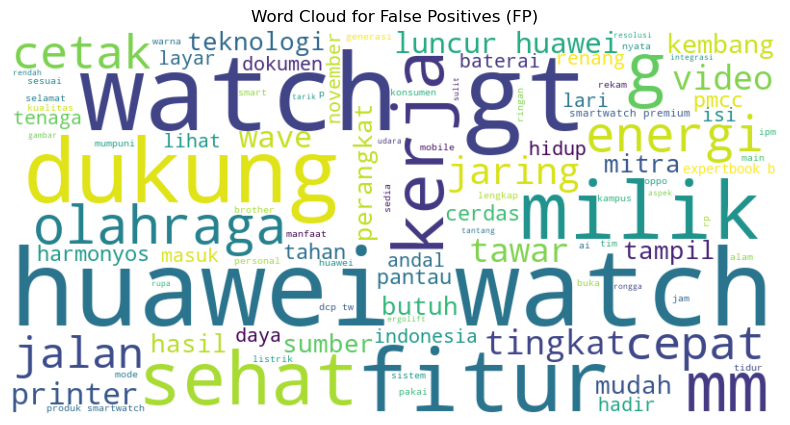

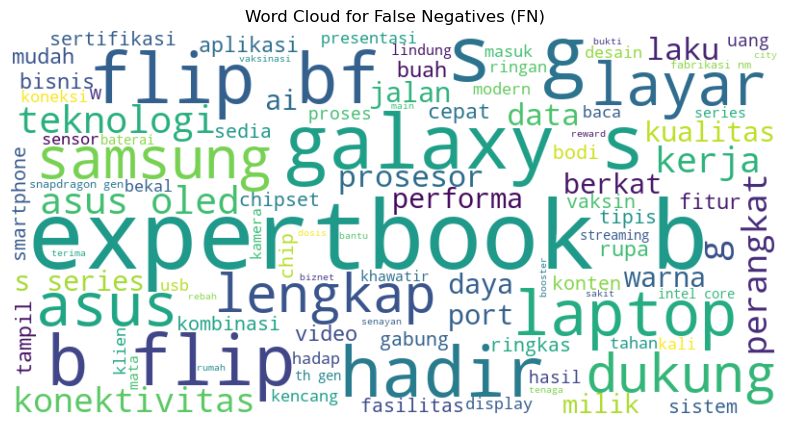

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content per paragraf' untuk FP dan FN
fp_text = " ".join(paragraph for paragraph in FP_data['content_stopwords'])
fn_text = " ".join(paragraph for paragraph in FN_data['content_stopwords'])

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk False Positives
plot_wordcloud(fp_text, "Word Cloud for False Positives (FP)")

# Membuat word cloud untuk False Negatives
plot_wordcloud(fn_text, "Word Cloud for False Negatives (FN)")

## TP & TN

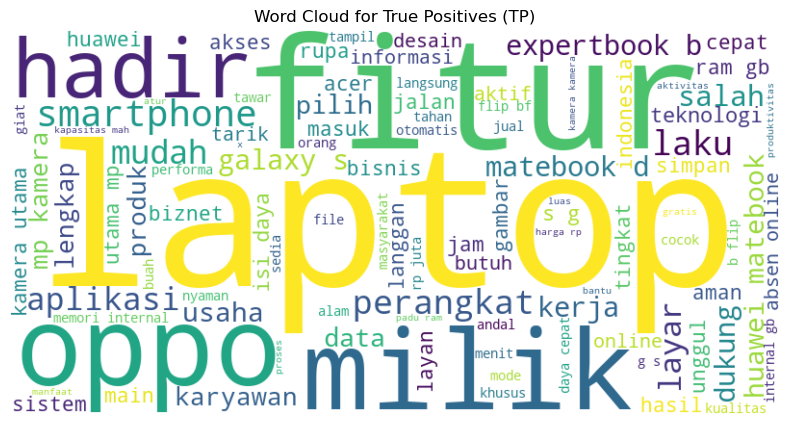

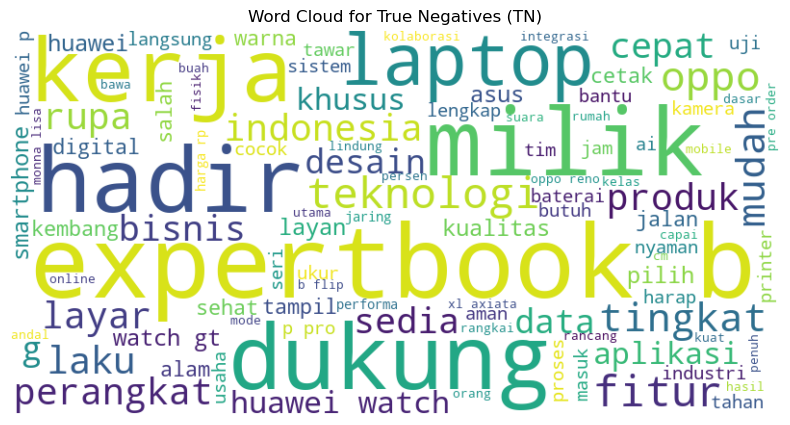

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil data TP dan TN dari dataset
TP_data = dataset.iloc[TP_indices]['content_stopwords']
TN_data = dataset.iloc[TN_indices]['content_stopwords']

# Gabungkan teks dari TP dan TN
tp_text = " ".join(paragraph for paragraph in TP_data)
tn_text = " ".join(paragraph for paragraph in TN_data)

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk True Positives
plot_wordcloud(tp_text, "Word Cloud for True Positives (TP)")

# Membuat word cloud untuk True Negatives
plot_wordcloud(tn_text, "Word Cloud for True Negatives (TN)")